In [65]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt

Reading the entire file into memory requires more RAM, since in-memory representation can easily become much larger than available RAM. So we're reading a fraction of axis items (21 percent)

In [66]:
df = pd.read_csv('datasets_cleaned/final_train.csv',index_col='TransactionID').sample(frac =.21)

In [67]:
df.head()

,Unnamed: 0,Unnamed: 0.1,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
TransactionID,,,,,,,,,,,,,,,,,,,,,
3348902,361902,361902,0,8975746,77.000,W,2884,490.0,150.0,visa,...,Found,Windows 10,chrome 63.0,26.508597,1920x1080,match_status:2,T,F,T,F
3212893,225893,225893,1,5340867,77.000,W,9500,321.0,150.0,visa,...,Found,Windows 10,chrome 63.0,26.508597,1920x1080,match_status:2,T,F,T,F
3067388,80388,80388,0,1728582,50.000,H,17933,512.0,150.0,visa,...,NotFound,Windows 7,chrome 63.0,24.000000,1280x1024,match_status:2,T,F,T,T
3265894,278894,278894,0,6799059,14.138,C,2877,141.0,185.0,visa,...,Found,Windows 10,chrome 63.0,26.508597,1920x1080,match_status:2,T,F,T,F
3275758,288758,288758,0,7094495,150.000,R,2616,327.0,150.0,discover,...,NotFound,iOS,mobile safari generic,32.000000,2048x1536,match_status:1,T,F,F,T


In [68]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

## Data Exploration

In [69]:
df['isFraud'].value_counts()

0    85480
1     3101
Name: isFraud, dtype: int64

This data set is very imbalanced. Only 3.5% (3101/88581) are labelled as 1 (fraud), and 96.5% (85480/88581) is 0 (not fraud).

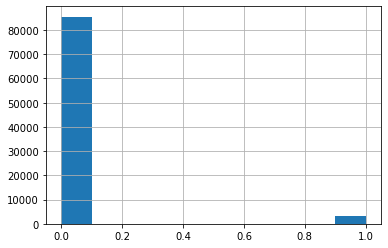

In [70]:
# imbalanced dataset
df['isFraud'].hist()
plt.show()

In [71]:
# explore categorical features
df.select_dtypes(include='O')

,ProductCD,card4,card6,P_emaildomain,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38
TransactionID,,,,,,,,,,,,,,,,,,,
3348902,W,visa,debit,gmail.com,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F
3212893,W,visa,debit,gmail.com,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F
3067388,H,visa,debit,anonymous.com,NotFound,New,NotFound,IP_PROXY:TRANSPARENT,Found,New,NotFound,Windows 7,chrome 63.0,1280x1024,match_status:2,T,F,T,T
3265894,C,visa,credit,yahoo.com.mx,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F
3275758,R,discover,credit,anonymous.com,NotFound,New,NotFound,IP_PROXY:TRANSPARENT,Found,New,NotFound,iOS,mobile safari generic,2048x1536,match_status:1,T,F,F,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111719,W,visa,debit,yahoo.com,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F
3537222,R,visa,credit,comcast.net,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,iOS 11.3.0,mobile safari 11.0,2732x2048,match_status:1,T,F,F,F
3055191,C,visa,debit,hotmail.com,NotFound,Unknown,Found,IP_PROXY:TRANSPARENT,Found,New,NotFound,Windows 10,mobile safari 11.0,1920x1080,match_status:2,F,F,F,T


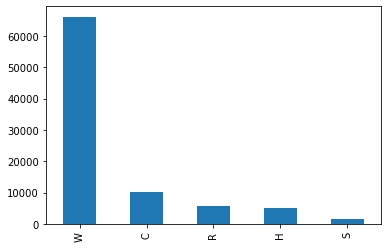

In [72]:
# Product code count
df['ProductCD'].value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:>

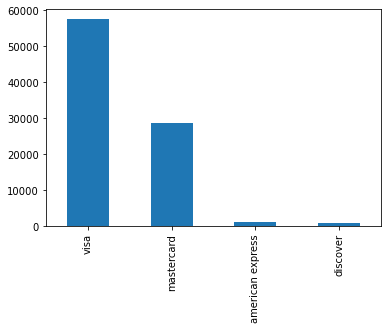

In [73]:
# credit card count
df['card4'].value_counts().plot(kind='bar')

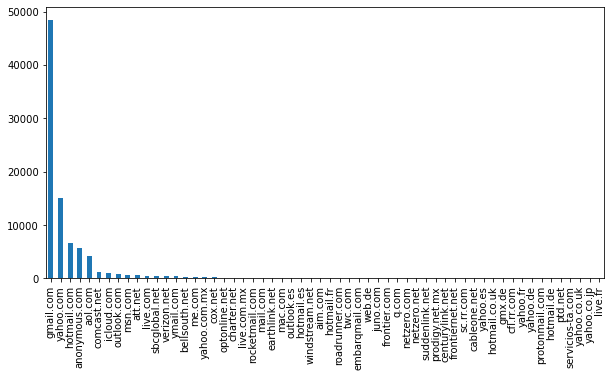

In [74]:
# email distribution
df['P_emaildomain'].value_counts().plot(kind='bar', figsize=(10,5))
plt.show()

In [75]:
# explore numeric features
df.select_dtypes(exclude='O')

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
TransactionID,,,,,,,,,,,,,,,,,,,,,
3348902,0,8975746,77.000,2884,490.0,150.0,226.0,220.000000,87.00000,1.0,...,189.451377,14.237337,353.128174,403.882666,368.26982,16.002708,12.800927,329.608924,149.070308,26.508597
3212893,1,5340867,77.000,9500,321.0,150.0,226.0,204.000000,87.00000,5.0,...,189.451377,14.237337,353.128174,403.882666,368.26982,16.002708,12.800927,329.608924,149.070308,26.508597
3067388,0,1728582,50.000,17933,512.0,150.0,195.0,299.000000,87.00000,1.0,...,166.000000,14.237337,542.000000,222.000000,368.26982,16.002708,12.800927,329.608924,149.070308,24.000000
3265894,0,6799059,14.138,2877,141.0,185.0,137.0,290.733794,86.80063,1.0,...,189.451377,14.237337,353.128174,403.882666,368.26982,16.002708,12.800927,329.608924,149.070308,26.508597
3275758,0,7094495,150.000,2616,327.0,150.0,102.0,272.000000,87.00000,1.0,...,166.000000,14.237337,410.000000,611.000000,368.26982,16.002708,12.800927,329.608924,149.070308,32.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111719,0,2476302,828.130,7664,490.0,150.0,226.0,264.000000,87.00000,1.0,...,189.451377,14.237337,353.128174,403.882666,368.26982,16.002708,12.800927,329.608924,149.070308,26.508597
3537222,0,14522431,50.000,6019,583.0,150.0,226.0,225.000000,87.00000,1.0,...,166.000000,14.237337,215.000000,266.000000,368.26982,16.002708,12.800927,329.608924,149.070308,32.000000
3055191,0,1542890,25.535,15885,545.0,185.0,138.0,290.733794,86.80063,2.0,...,225.000000,14.237337,266.000000,325.000000,368.26982,16.002708,12.800927,329.608924,149.070308,26.508597


<AxesSubplot:>

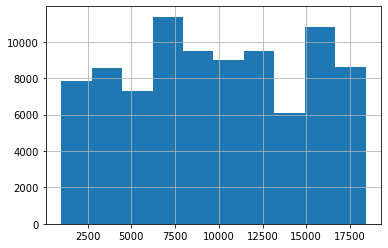

In [76]:
df['card1'].hist()

<AxesSubplot:>

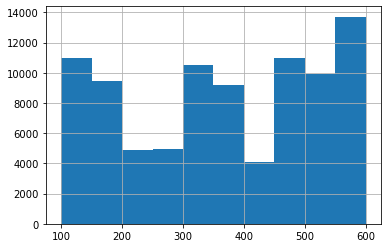

In [77]:
df['card2'].hist()

<AxesSubplot:>

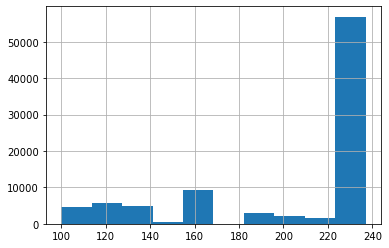

In [78]:
df['card5'].hist()

<AxesSubplot:>

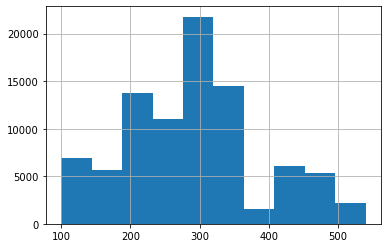

In [79]:
df['addr1'].hist()

<AxesSubplot:>

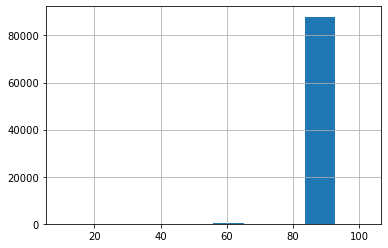

In [80]:
df['addr2'].hist()

<AxesSubplot:>

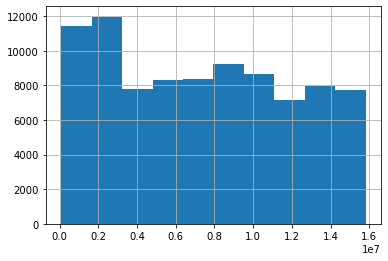

In [81]:
df['TransactionDT'].hist()

In [82]:
# TransactionAmt have some outliers
print('mean',df['TransactionAmt'].mean())
print('max',df['TransactionAmt'].max())
print('min',df['TransactionAmt'].min())
print('mode',df['TransactionAmt'].mode())
print('median',df['TransactionAmt'].median())

mean 134.75973225631932
max 5420.0
min 0.424
mode 0    59.0
dtype: float64
median 68.95


In [83]:
df.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,88581.000000,8.858100e+04,88581.000000,88581.000000,88581.000000,88581.000000,88581.000000,88581.000000,88581.000000,88581.000000,...,88581.000000,88581.000000,88581.000000,88581.000000,88581.000000,88581.000000,88581.000000,88581.000000,88581.000000,88581.000000
mean,0.035008,7.380637e+06,134.759732,9882.719342,362.155059,153.189718,199.078115,291.331450,86.807918,13.968289,...,189.433483,14.238580,353.301920,403.808370,368.277514,16.004412,12.800958,329.621300,149.086081,26.510164
std,0.183800,4.621765e+06,230.858219,4898.982597,156.545103,11.247716,41.197459,96.243929,2.457115,131.301665,...,14.751700,0.429326,68.577605,73.723476,18.279920,0.674018,0.207814,9.207322,2.969052,1.349712
min,0.000000,8.649900e+04,0.424000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,...,100.000000,11.000000,100.000000,100.000000,101.000000,14.000000,11.000000,100.000000,100.000000,16.000000
25%,0.000000,3.024325e+06,43.970000,6019.000000,215.000000,150.000000,166.000000,205.000000,87.000000,1.000000,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
50%,0.000000,7.324879e+06,68.950000,9633.000000,361.000000,150.000000,226.000000,290.733794,87.000000,1.000000,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
75%,0.000000,1.124275e+07,125.000000,14165.000000,512.000000,150.000000,226.000000,327.000000,87.000000,3.000000,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
max,1.000000,1.581094e+07,5420.000000,18395.000000,600.000000,229.000000,237.000000,540.000000,102.000000,4681.000000,...,226.000000,29.000000,670.000000,660.000000,854.000000,41.000000,26.000000,548.000000,216.000000,32.000000


## Exploring outliers

In [84]:
df[(df['TransactionAmt'] < df['TransactionAmt'].quantile(0.025))].shape

(2198, 238)

In [85]:
df[(df['TransactionAmt'] > df['TransactionAmt'].quantile(0.975))].shape

(2215, 238)

In [86]:
df[(df['TransactionDT'] < df['TransactionDT'].quantile(0.025))].shape

(2215, 238)

In [87]:
df[(df['TransactionDT'] > df['TransactionDT'].quantile(0.975))].shape

(2215, 238)

In [88]:
# dropping outliers
df.drop(df[(df['TransactionAmt'] > df['TransactionAmt'].quantile(0.975)) 
           | (df['TransactionAmt'] < df['TransactionAmt'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['TransactionDT'] > df['TransactionDT'].quantile(0.975)) 
           | (df['TransactionDT'] < df['TransactionDT'].quantile(0.025))].index, inplace=True)

In [89]:
df.shape

(79958, 238)

In [90]:
# Exploring test dataset
test = pd.read_csv('datasets_cleaned/final_test.csv',index_col='TransactionID').sample(frac =.21)
test.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [91]:
test.describe()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,7.600400e+04,76004.000000,76004.000000,76004.000000,76004.000000,76004.000000,76004.000000,76004.000000,76004.000000,76004.000000,...,76004.000000,76004.000000,76004.000000,76004.000000,76004.000000,76004.000000,76004.000000,76004.000000,76004.000000,76004.000000
mean,2.691002e+07,134.656738,9939.667728,363.792100,153.485717,200.231162,291.478094,86.739856,10.106614,10.738892,...,42.282243,20.846230,43.042042,26.339106,31.720222,70.074540,46.343413,24.714282,49.201038,38.358270
std,4.753684e+06,240.063560,4887.995285,157.572245,12.256660,40.316352,95.186855,2.652307,78.470224,88.059386,...,369.018795,90.064618,194.897973,111.314391,1133.936276,1255.558913,1178.480882,546.494958,2296.916643,2264.495987
min,1.840335e+07,0.018000,1004.000000,100.000000,100.000000,100.000000,100.000000,16.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.273466e+07,40.000000,6019.000000,215.000000,150.000000,166.000000,205.000000,87.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.720387e+07,67.950000,9754.000000,363.735379,150.000000,226.000000,291.846514,87.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.129389e+07,125.000000,14276.000000,512.000000,150.000000,226.000000,327.000000,87.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.421434e+07,6197.360000,18395.000000,600.000000,231.000000,237.000000,540.000000,102.000000,2941.000000,3259.000000,...,50000.000000,4111.470215,7015.899902,4111.470215,273229.000000,273229.000000,273229.000000,84500.000000,605000.000000,605000.000000


In [92]:
# TransactionAmt have some outliers
print('mean',test['TransactionAmt'].mean())
print('max',test['TransactionAmt'].max())
print('min',test['TransactionAmt'].min())
print('mode',test['TransactionAmt'].mode())
print('median',test['TransactionAmt'].median())

mean 134.65673764538008
max 6197.36
min 0.018
mode 0    59.0
dtype: float64
median 67.95


In [93]:
test[(test['TransactionAmt'] < test['TransactionAmt'].quantile(0.025))].shape

(1900, 199)

In [94]:
test[(test['TransactionAmt'] > test['TransactionAmt'].quantile(0.975))].shape

(1891, 199)

In [95]:
test[(test['TransactionDT'] < test['TransactionDT'].quantile(0.025))].shape

(1901, 199)

In [96]:
test[(test['TransactionDT'] > test['TransactionDT'].quantile(0.975))].shape

(1901, 199)

In [97]:
# dropping outliers
test.drop(test[(test['TransactionAmt'] > test['TransactionAmt'].quantile(0.975)) 
           | (test['TransactionAmt'] < test['TransactionAmt'].quantile(0.025))].index,inplace=True)
test.drop(test[(test['TransactionDT'] > test['TransactionDT'].quantile(0.975)) 
           | (test['TransactionDT'] < test['TransactionDT'].quantile(0.025))].index, inplace=True)

In [98]:
test.shape

(68601, 199)

<AxesSubplot:xlabel='TransactionID'>

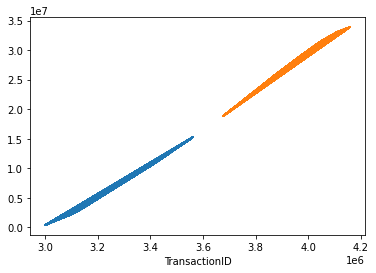

In [99]:
# train, test Transaction Time diff
df['TransactionDT'].plot()
test['TransactionDT'].plot()

<AxesSubplot:xlabel='TransactionID'>

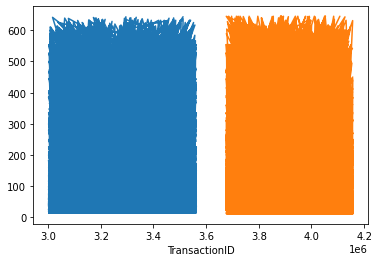

In [100]:
df['TransactionAmt'].plot()
test['TransactionAmt'].plot()

In [101]:
# creating dummies
df = pd.get_dummies(df)

In [102]:
test = pd.get_dummies(test)

In [103]:
# # save train,test with dummies as pickle
import pickle 
pickle_out = open("datasets_modeling/train_dummy.pickle","wb")
pickle.dump(df, pickle_out)

pickle_out = open("datasets_modeling/test_dummy.pickle","wb")
pickle.dump(test, pickle_out)
pickle_out.close()

In [104]:
# del df, test
gc.collect()

106